In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [153]:
# Загружаем данные из pandas
data = pd.read_csv('../csv_file/train.csv')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_19880\1310205317.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449

In [ ]:
data.info()

data.head()

Train Data Info ----------------------------------------------:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB
None

Train Data Head -------------------------------------------:
  report_date  client_id  target  col1  col2  col3  col4  col5  col6  col7  \
0  2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  2022-09-01          7       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  2022-08-01          8       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...    col2654    col2655    col2656  col2657  col2658  col2659    col2660  \
0  ...        NaN        NaN        NaN      NaN      NaN      NaN        NaN   
1  ...  7616803.0  7616803.0  7616803.0      Na

In [155]:
data.isnull().sum()

report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2666, dtype: int64

In [156]:
threshold = 13500
missing_counts = data.isnull().sum()
columns_to_drop = missing_counts[missing_counts > threshold].index
data = data.drop(columns=columns_to_drop)

In [157]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.heatmap(data.isna(), cmap="viridis", cbar=False)
# plt.title("Визуализация пропусков")
# plt.show()


In [158]:
print("Размер данных до удаления:", data.shape)
data = data.dropna(axis=1, how='all')
print("Размер данных после удаления:", data.shape)


Размер данных до удаления: (14456, 797)
Размер данных после удаления: (14456, 797)


In [159]:
missing_percentage = data.isnull().mean() * 100

print("Процент пропусков в каждой колонке:")
print(missing_percentage)

Процент пропусков в каждой колонке:
report_date     0.000000
client_id       0.000000
target          0.000000
col475         92.335362
col476         89.091035
                 ...    
col2656        57.062811
col2660        44.410625
col2661        44.410625
col2662        44.410625
col2663         0.000000
Length: 797, dtype: float64


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 797 entries, report_date to col2663
dtypes: float64(772), int64(3), object(22)
memory usage: 87.9+ MB


In [161]:
data.dtypes

report_date     object
client_id        int64
target           int64
col475         float64
col476         float64
                ...   
col2656        float64
col2660        float64
col2661        float64
col2662        float64
col2663        float64
Length: 797, dtype: object

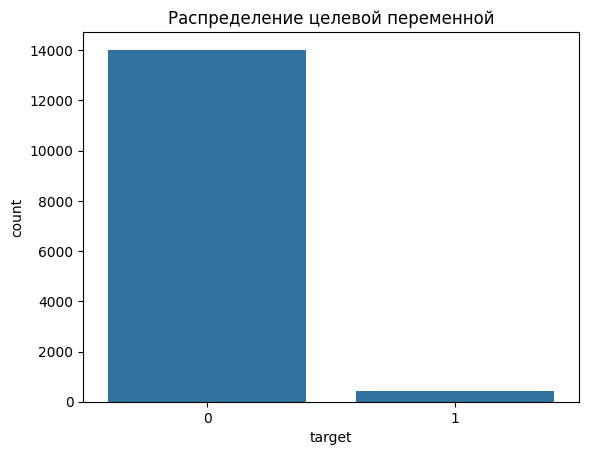

In [162]:
sns.countplot(x='target', data=data)
plt.title('Распределение целевой переменной')
plt.show()

In [163]:
data.describe()

,client_id,target,col475,col476,col479,col480,col483,col484,col487,col488,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
count,14456.000000,14456.000000,1108.000000,1577.000000,1108.000000,1577.000000,1108.000000,1577.000000,1108.000000,1577.000000,...,3.564000e+03,3.564000e+03,3.564000e+03,6.207000e+03,6.207000e+03,6.207000e+03,8.036000e+03,8.036000e+03,8.036000e+03,14456.000000
mean,2853.066270,0.030160,57.429470,57.642212,55.699860,55.037694,56.858178,56.832016,56.850414,56.946779,...,7.114481e+06,7.039035e+06,7.077030e+06,6.951439e+06,6.843002e+06,6.896837e+06,6.934524e+06,6.806725e+06,6.869273e+06,0.258330
std,1957.002315,0.171035,4.446021,4.234385,6.393634,6.498010,4.575838,4.345248,4.741677,4.542342,...,4.754455e+06,4.734537e+06,4.736366e+06,4.539805e+06,4.509677e+06,4.509058e+06,4.354458e+06,4.315602e+06,4.314412e+06,0.006802
min,1.000000,0.000000,13.886200,13.886200,-25.759900,-25.759900,13.886200,13.886200,13.886200,13.886200,...,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,1.000000e+05,3.000000e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230229
25%,1186.000000,0.000000,55.748300,55.748300,55.155300,53.385400,55.738602,55.739724,55.748300,55.748300,...,4.501000e+06,4.482000e+06,4.500000e+06,4.316300e+06,4.248000e+06,4.300000e+06,4.334639e+06,4.276000e+06,4.303000e+06,0.256261
50%,2568.000000,0.000000,59.898300,59.898300,55.748300,55.748300,57.818451,57.504180,58.345600,59.246600,...,6.437500e+06,6.379930e+06,6.407428e+06,6.240000e+06,6.164000e+06,6.224000e+06,6.244578e+06,6.146774e+06,6.225550e+06,0.256261
75%,4258.250000,0.000000,59.898300,59.898300,59.898300,59.898300,59.898300,59.898300,59.898300,59.898300,...,9.000000e+06,8.903750e+06,8.984016e+06,8.801262e+06,8.649254e+06,8.748625e+06,8.769750e+06,8.619750e+06,8.700000e+06,0.257217
max,8302.000000,1.000000,69.344400,69.344400,69.344400,69.344400,69.344398,69.344398,69.344400,69.344400,...,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


<Axes: >

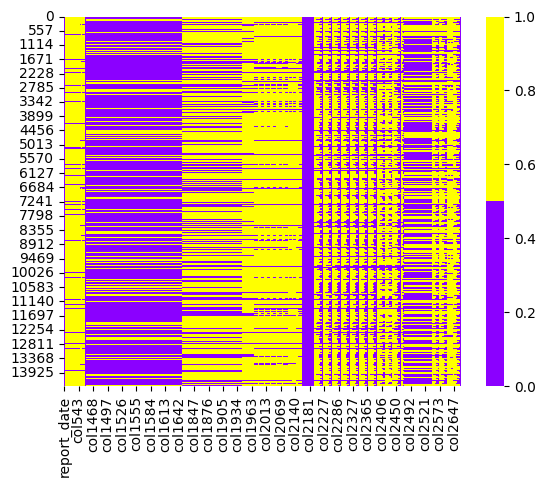

In [164]:
cols = data.columns
#фиолетовые - не пропущенные данные, желтые - пропущенные
colours = ['#8b00ff', '#ffff00']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [165]:
data.head(10)

,report_date,client_id,target,col475,col476,col479,col480,col483,col484,col487,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.7483,55.7483,55.748299,55.748299,55.7483,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,55.7483,55.7483,55.7483,55.7483,55.748299,55.748299,55.7483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [166]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

report_date     0.000000
client_id       0.000000
target          0.000000
col475         92.335362
col476         89.091035
                 ...    
col2656        57.062811
col2660        44.410625
col2661        44.410625
col2662        44.410625
col2663         0.000000
Length: 797, dtype: float64


In [167]:
# # Установить максимальное количество строк и столбцов для отображения
# pd.set_option('display.max_rows', None)  # Показывать все строки
# pd.set_option('display.max_columns', None)  # Показывать все столбцы

# # Для удобства ширину столбцов тоже можно увеличить
# pd.set_option('display.width', 1000)

In [168]:
data.drop_duplicates(inplace=True)

In [169]:
df_sorted = data.sort_values(by='col2663', ascending=False)
df_sorted.head()

,report_date,client_id,target,col475,col476,col479,col480,col483,col484,col487,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
14073,2023-02-01,1150,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
8996,2022-11-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
6389,2022-12-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
790,2022-08-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
564,2023-02-01,843,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338927


In [170]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14456 entries, 14073 to 6042
Columns: 797 entries, report_date to col2663
dtypes: float64(772), int64(3), object(22)
memory usage: 88.0+ MB


In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': ['report_date', 'col519', 'col520', 'col527', 'col528', 'col535', 'col536', 'col543', 'col544', 'col551', 'col552', 'col560', 'col568', 'col576', 'col591', 'col592', 'col599', 'col600', 'col607', 'col608', 'col616', 'col1454']


In [172]:
df_sorted = df_sorted.drop(columns=['report_date', 'col519', 'col520', 'col527', 'col528', 'col535', 'col536', 'col543', 'col544', 'col551', 'col552', 'col560', 'col568', 'col576', 'col591', 'col592', 'col599', 'col600', 'col607', 'col608', 'col616', 'col1454'])


In [173]:
object_columns = df_sorted.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': []


In [174]:
df_sorted.info()
df_sorted.shape

<class 'pandas.core.frame.DataFrame'>
Index: 14456 entries, 14073 to 6042
Columns: 775 entries, client_id to col2663
dtypes: float64(772), int64(3)
memory usage: 85.6 MB


(14456, 775)

In [175]:
# Получаем список уникальных типов данных
dtypes = df_sorted.dtypes.unique()

# Просматриваем данные для каждого типа
for dtype in dtypes:
    print(f"\nКолонки с типом {dtype}:")
    cols = df_sorted.select_dtypes(include=[dtype]).columns
    print(df_sorted[cols])


Колонки с типом int64:
       client_id  target  col1453
14073       1150       1        0
8996        1150       0        0
6389        1150       0        0
790         1150       0        0
564          843       0        0
...          ...     ...      ...
9506        4512       0        0
7473        4512       0        0
8372        4512       0        0
10082       4512       0        0
6042        4512       0        0

[14456 rows x 3 columns]

Колонки с типом float64:
       col475  col476  col479  col480  col483  col484  col487  col488  col491  \
14073     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8996      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6389      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
790       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
564       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...       ...     ...     ... 

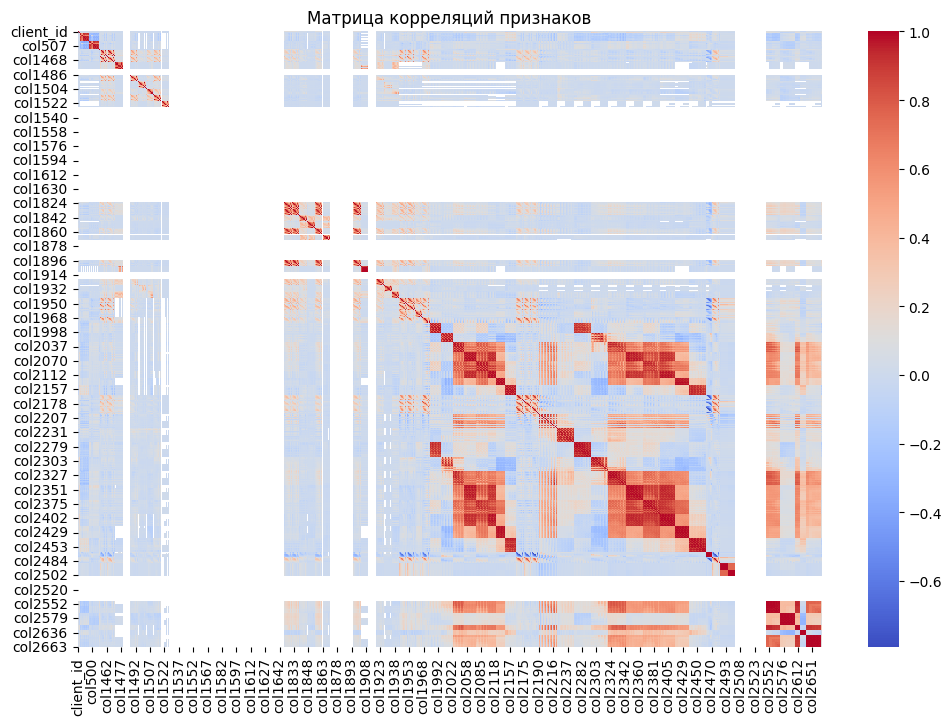

In [176]:
# Анализ корреляций
correlation_matrix = df_sorted.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Матрица корреляций признаков')
plt.show()

In [177]:
df_sorted.to_csv('pre-edit1.csv', index=False)